<a href="https://colab.research.google.com/github/hussein343455/GAN-pytorch-CNN-TensorFlow/blob/main/pre_traind_networks_feature_extraction/comparison_study_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot   
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np


170508288/170498071 [==============================] - 11s 0us/step
Train: X=(5000, 32, 32, 3), y=(5000, 1)
Test: X=(1000, 32, 32, 3), y=(1000, 1)


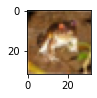

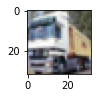

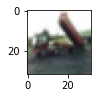

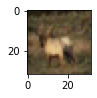

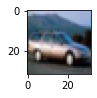

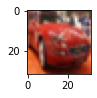

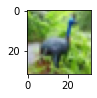

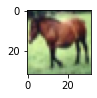

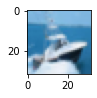

In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data() 
trainX=trainX[0:5000]
trainY=trainY[0:5000]
testX=testX[0:1000]
testY=testY[0:1000]
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
for i in range(9):  
  # define subplot
  pyplot.subplot(330 + 1 + i) 
  # plot raw pixel data
  pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))  
  # show the figure
  pyplot.show()  


# trainY=to_categorical(trainY, num_classes=10) #Line 9
# testY=to_categorical(testY, num_classes=10)  #Line 10


In [ ]:
image_input = Input(shape=(32,32, 3))
baseModel_VGG_19 = VGG19(include_top=True,weights='imagenet',input_tensor=image_input)    
baseModel_VGG_19.summary() 

# from keras.applications.vgg16 import VGG16
# baseModel_VGG_19 = VGG16(weights='imagenet', include_top=False,input_tensor=image_input)
# model.summary()

# from keras.applications.resnet import ResNet50
# baseModel_VGG_19 = ResNet50(include_top=False, weights='imagenet', input_tensor=image_input)

# from tensorflow.keras.applications import MobileNetV2
# baseModel_VGG_19 = MobileNetV2(include_top=False,weights='imagenet',input_tensor=image_input)

In [ ]:
for i,layer in enumerate(baseModel_VGG_19.layers):  
  layer.trainable=False                          
  print("Layer Number :",i, "Layer Name :", layer.name, "LayerShape(Input_Shape,Output Shape) : (",
        layer.input_shape, layer.output_shape, ") is Trainable:", layer.trainable,"No of Parameter :",layer.count_params())

In [ ]:
from tensorflow.keras import Model
x=baseModel_VGG_19.layers[-1].output 
model = Model(inputs = baseModel_VGG_19.input, outputs = x)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_9[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

In [ ]:
import numpy as np
Features_train0= model.predict(trainX) 
Features_test0= model.predict(testX) 

Features_train=np.reshape(Features_train0,(5000,-1))
Features_test=np.reshape(Features_test0,(1000,-1))

trainY=np.reshape(trainY,(-1))
testY=np.reshape(testY,(-1))
print('Train: X=%s, y=%s' % (Features_train.shape, trainY.shape))
print('Test: X=%s, y=%s' % (Features_test.shape, testY.shape))


Train: X=(5000, 1280), y=(5000,)
Test: X=(1000, 1280), y=(1000,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
m=["linear","rbf","poly","sigmoid"]
for im in m:
  # ["linear","rbf","poly","sigmoid"]
  classifier = SVC(kernel=im)
  classifier.fit(Features_train, trainY)

  Y_pred = classifier.predict(Features_test)
  cm = confusion_matrix(testY, Y_pred)
  accuracy = float(cm.diagonal().sum()) / len(testY)
  print("\nAccuracy Of SVM For The Given Dataset : ",im , accuracy)


Accuracy Of SVM For The Given Dataset :  linear 0.197

Accuracy Of SVM For The Given Dataset :  rbf 0.201

Accuracy Of SVM For The Given Dataset :  poly 0.157

Accuracy Of SVM For The Given Dataset :  sigmoid 0.147


In [ ]:
#Training logistic regression  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr= LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(Features_train,trainY)

predictions=lr.predict(Features_test)
cm = confusion_matrix(testY, predictions)
print("Accuracy Score for LogisticRegression :",float(cm.diagonal().sum()) / len(testY))

Accuracy Score for LogisticRegression : 0.212


In [ ]:
from sklearn.ensemble import AdaBoostClassifier  # For Classification
from sklearn.ensemble import AdaBoostRegressor  # For Regression
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
# classifier = SVC(kernel='linear')
cl = AdaBoostClassifier(n_estimators=100, base_estimator=dtree, learning_rate=6)
cl.fit(Features_train, trainY)
y_pred = cl.predict(Features_test)
# evaluate predictions
accuracy = accuracy_score(testY, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 15.00%
